In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [56]:
data = pd.read_csv('Folds5x2_pp.csv')

In [57]:
data = data.apply(pd.to_numeric, errors='coerce')

In [58]:
data = data.dropna()

In [59]:
X = np.array(data[ ['AT', 'V']])

In [60]:
X.shape

(47840, 2)

In [61]:
np.linalg.matrix_rank(X)

2

In [62]:
y = np.array(data['PE'])

In [63]:
def return_beta(X, y):
    '''fit y = X \beta + \beta_0.
    return \beta'''
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_

### Calculate Bootstrap Betas

In [64]:
np.random.seed(4321)

In [65]:
beta_array = []

for _ in range(500):
    idx = np.random.choice(np.arange(X.shape[0]), 100, False);
    beta_array.append(return_beta(X[idx], y[idx]))

In [66]:
beta_array = np.array(beta_array)

In [67]:
np.linalg.matrix_rank(beta_array)

2

### 4(a) Look at distribution of marginals

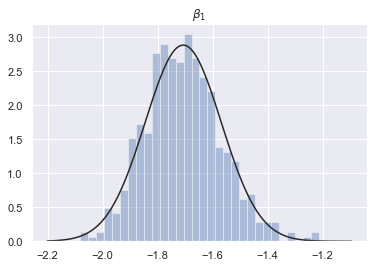

In [68]:
sns.distplot(beta_array[:, 0], bins = 30, kde=False, fit=stats.norm)
plt.title(r'$\beta_1$')
plt.savefig('marginal_beta_1.pdf',bbox_inches='tight' )

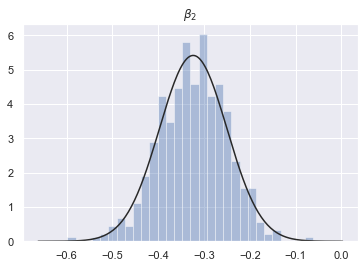

In [69]:
sns.distplot(beta_array[:, 1], bins = 30, kde=False, fit=stats.norm)
plt.title(r'$\beta_2$')
plt.savefig('marginal_beta_2.pdf',bbox_inches='tight' )

In [70]:
beta_array.shape

(500, 2)

In [71]:
beta_mean = np.zeros(2)
beta_mean[0] = beta_array[:,0].mean() ## empricial mean of all betas from boostrap
beta_mean[1] = beta_array[:,1].mean()

In [72]:
beta_mean

array([-1.70685735, -0.32382007])

### 4(b) Principal Directions

In [73]:
x_pca = PCA(n_components=2)
x_pca.fit(X)
x_u = x_pca.components_

In [74]:
x_u

array([[-0.47307613, -0.88102155],
       [-0.88102155,  0.47307613]])

In [75]:
x_u[0,:]

array([-0.47307613, -0.88102155])

In [76]:
beta_pca = PCA(n_components=2)
beta_pca.fit(beta_array)
beta_u = beta_pca.components_

In [77]:
beta_u

array([[ 0.901886  , -0.43197412],
       [-0.43197412, -0.901886  ]])

In [78]:
x_u = x_u.T
beta_u = beta_u.T

In [79]:
#beta_u = #matrix with principal directions of beta cloud as rows
#x_u = #matrix with principal directions of the X as rows

In [80]:
scaling = 0.15 ## a variable to make adjust the length of the arrows

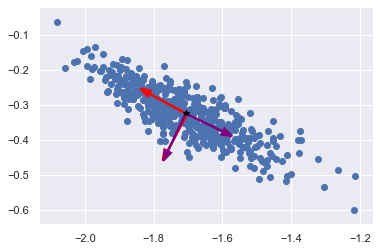

In [81]:
plt.scatter(beta_array[:, 0], beta_array[:, 1])

plt.plot(beta_mean[0], beta_mean[1], '*', color='black')

### plot principle direction of the covariance matrix of X
plt.arrow(beta_mean[0], beta_mean[1], scaling*x_u[1, 0], scaling*x_u[1, 1], head_width=0.02, 
         head_length=0.03, fc='red', ec='red',length_includes_head=True,lw=2)
plt.arrow(-1.703, -0.326,  scaling*x_u[0, 0], scaling*x_u[0, 1], head_width=0.02, 
         head_length=0.03, fc='red', ec='red',length_includes_head=True,lw=2)


### plot principle direction of the covariance matrix of betas
plt.arrow(beta_mean[0], beta_mean[1],  scaling*beta_u[0, 0], scaling*beta_u[0, 1], head_width=0.02, 
         head_length=0.03, fc='purple', ec='purple',length_includes_head=True,lw=2)
plt.arrow(beta_mean[0], beta_mean[1], scaling*beta_u[1, 0], scaling*beta_u[1, 1], head_width=0.02, 
         head_length=0.03, fc='purple', ec='purple',length_includes_head=True,lw=2)

plt.plot()

plt.savefig('scatter_plot.pdf',bbox_inches='tight' )

4(c) Do the principal directions of $X$ datapoints and $\beta^k$ datapoints align? Give a condition on the data generation process under which these principal directions will align. 
